<a href="https://colab.research.google.com/github/AnnSenina/Python_for_CL/blob/main/notebooks/Python_11_n_gramms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Сначала спарсим текст и займемся его препроцессингом

Если скачивать долго: готовые данные можно скачать [отсюда](https://www.kaggle.com/datasets/ashishsinhaiitr/lord-of-the-rings-text)

Kaggle - требует регистрации, однако невероятно полезен!

In [1]:
#!pip install requests 
# !pip install beautifulsoup4 

import requests as rq
from bs4 import BeautifulSoup

In [ ]:
url = 'https://libcat.ru/knigi/fantastika-i-fjentezi/fentezi/278227-j-tolkien-the-lord-of-the-rings.html'
page = rq.get(url) 
print(page) # посмотрим на код ответа, если 200, все хорошо

In [ ]:
soup = BeautifulSoup(page.text, features="html.parser") #сохраним результат в переменную soup
print(soup.prettify()) # показывает нашу страницу в красивом виде

In [ ]:
text = []
for i in soup.find_all("p"):
  text.append(i.text)

text[8:-5]

In [5]:
all_links = ['https://libcat.ru/knigi/fantastika-i-fjentezi/fentezi/278227-j-tolkien-the-lord-of-the-rings.html']
for i in range(2, 393):
  link = 'https://libcat.ru/knigi/fantastika-i-fjentezi/fentezi/278227-' + str(i) + '-j-tolkien-the-lord-of-the-rings.html#text'
  all_links.append(link)
len(all_links)

392

In [ ]:
all_links

Внимание! Парсить будем минут 5!

Идеальное время для вопросов

In [ ]:
text = []
for i in all_links:
  url = i
  page = rq.get(url) 
  soup = BeautifulSoup(page.text, features="html.parser") 
  for sent in soup.find_all("p")[8:-5]:
    text.append(sent.text)

text
#print(text)

In [ ]:
text_str = ' '.join(text)
text_str
#print(text_str)

##Препроцессим с NLTK

In [2]:
# все то, что надо импортировать из NLTK
#!pip install nltk

import nltk

from nltk.tokenize import word_tokenize, wordpunct_tokenize

from nltk import download
download('punkt')

download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('russian') 

from nltk.stem.snowball import SnowballStemmer 
stemmer = SnowballStemmer("russian")

[nltk_data] Downloading package punkt to /Users/Svetlana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Svetlana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# собрала препроцессинг в 1 функцию - пока только до стемминга, лемматизация по плану в следующий раз
def clean_text(text_str):
  text_str = text_str.lower() # нижний регистр
  text_list_nltk = word_tokenize(text_str) # токенизация
  stop_words = stopwords.words('english') 
  text_without_punkt = [word for word in text_list_nltk if word[0].isalpha()] # удалить пунктуацию из списка токенов
  text_clean = [word for word in text_without_punkt if word not in stop_words] # чистим от стоп-слов
  text_stemmed = [stemmer.stem(word) for word in text_clean] # стемминг
  return text_stemmed

full_text = clean_text(text_str)

In [ ]:
full_text
#print(full_text)

# Готово! Вернемся к частотам

In [ ]:
from collections import Counter
Counter(full_text).most_common(50)
#print(Counter(full_text).most_common(50))

Вспомним, что не так с нашими частотами?

##Облако слов

In [7]:
# Импортируем инструменты для облака слов и списки стоп-слов
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#%matplotlib inline

# Генерируем облако слов
wordcloud = WordCloud(max_font_size=50,
                      max_words=100, 
                      background_color="white",
                     colormap='rainbow').generate(', '.join(full_text))
plt.figure(figuresize=(40, 30))
plt.imshow(cloud_clean) # Что изображаем
plt.axis("off") # Без подписей на осях
plt.show() # показать изображение

NameError: name 'full_text' is not defined

In [1]:
#Print the ten most common words in the text:
import string
fhand = open('romeo.txt')
counts = dict()
for line in fhand:
    line = line.translate(str.maketrans('', '', string.punctuation))
    line = line.lower()
    words = line.split()
    for word in words:
        if word not in counts:
            counts[word] = 1
        else:
            counts[word] += 1

# Sort the dictionary by value
lst = list()
for key, val in list(counts.items()):
    lst.append((val, key))

lst.sort(reverse=True)

#Show the first 10 words only
for key, val in lst[:10]:
    print(key, val)

3 the
3 is
3 and
2 sun
1 yonder
1 with
1 window
1 who
1 what
1 through


### Задание

In [4]:
cloud = '''В любой непонятной ситуации дата-сайентист визуализирует данные: это, среди прочего, облегчает поиск инсайтов и формулирование гипотез для проверки.
Облако слов — визуализация текстовых данных на стыке исследовательского анализа, инфографики и дата-дизайна. Это самый первый и быстрый взгляд на большие и слабо структурированные тексты: художественные, научные, информационные.
Главные причины использовать облако слов:
Во-первых, это красиво — удачная визуализация украшает портфолио.
Во-вторых, облако показывает самые популярные слова текста, что полезно для быстрой его оценки.
Например, для школьного сочинения или текста в разговорном стиле это могут оказаться слова-паразиты (от таких неплохо бы избавляться), а для научных или «инфостильных» текстов — слова, больше относящиеся к содержанию.
В-третьих, сделать такую визуализацию совсем не сложно — и сейчас вы сами в этом убедитесь.
Мы будем работать в блокноте Google Colab — то есть прямо в браузере, код напишем на языке Python, а текст возьмём из «Википедии». Если что-то пойдёт не так — всегда можно свериться с нашим блокнотом: все ссылки есть в конце статьи.'''

# текст отсюда https://skillbox.ru/media/code/vizualiziruy-eto-oblako-slov-na-python/

In [ ]:
# ваш код


###Задание 2

Сначала предобработайте этот текст, затем создайте облако слов

In [5]:
# ваш код
def clean_text(cloud):
    cloud = cloud.lower() # нижний регистр
    text_list_nltk = word_tokenize(cloud) # токенизация
    stop_words = stopwords.words('russian')
    text_without_punkt = [word for word in text_list_nltk if word[0].isalpha()] # удалить пунктуацию из списка токенов
    cloud_clean = [word for word in text_without_punkt if word not in stop_words] # чистим от стоп-слов
    cloud_stemmed = [stemmer.stem(word) for word in cloud_clean] # стемминг
    return cloud_stemmed

cloud_clean = clean_text(cloud)
#cloud_clean

['люб',
 'непонятн',
 'ситуац',
 'дата-сайентист',
 'визуализир',
 'дан',
 'эт',
 'сред',
 'проч',
 'облегча',
 'поиск',
 'инсайт',
 'формулирован',
 'гипотез',
 'проверк',
 'облак',
 'слов',
 'визуализац',
 'текстов',
 'дан',
 'стык',
 'исследовательск',
 'анализ',
 'инфографик',
 'дата-дизайн',
 'эт',
 'сам',
 'перв',
 'быстр',
 'взгляд',
 'больш',
 'слаб',
 'структурирова',
 'текст',
 'художествен',
 'научн',
 'информацион',
 'главн',
 'причин',
 'использова',
 'облак',
 'слов',
 'во-перв',
 'эт',
 'красив',
 'удачн',
 'визуализац',
 'украша',
 'портфол',
 'во-втор',
 'облак',
 'показыва',
 'сам',
 'популярн',
 'слов',
 'текст',
 'полезн',
 'быстр',
 'оценк',
 'например',
 'школьн',
 'сочинен',
 'текст',
 'разговорн',
 'стил',
 'эт',
 'могут',
 'оказа',
 'слова-паразит',
 'так',
 'неплох',
 'избавля',
 'научн',
 'инфостильн',
 'текст',
 'слов',
 'относя',
 'содержан',
 'в-трет',
 'сдела',
 'так',
 'визуализац',
 'сложн',
 'сам',
 'убед',
 'буд',
 'работа',
 'блокнот',
 'google',
 'c

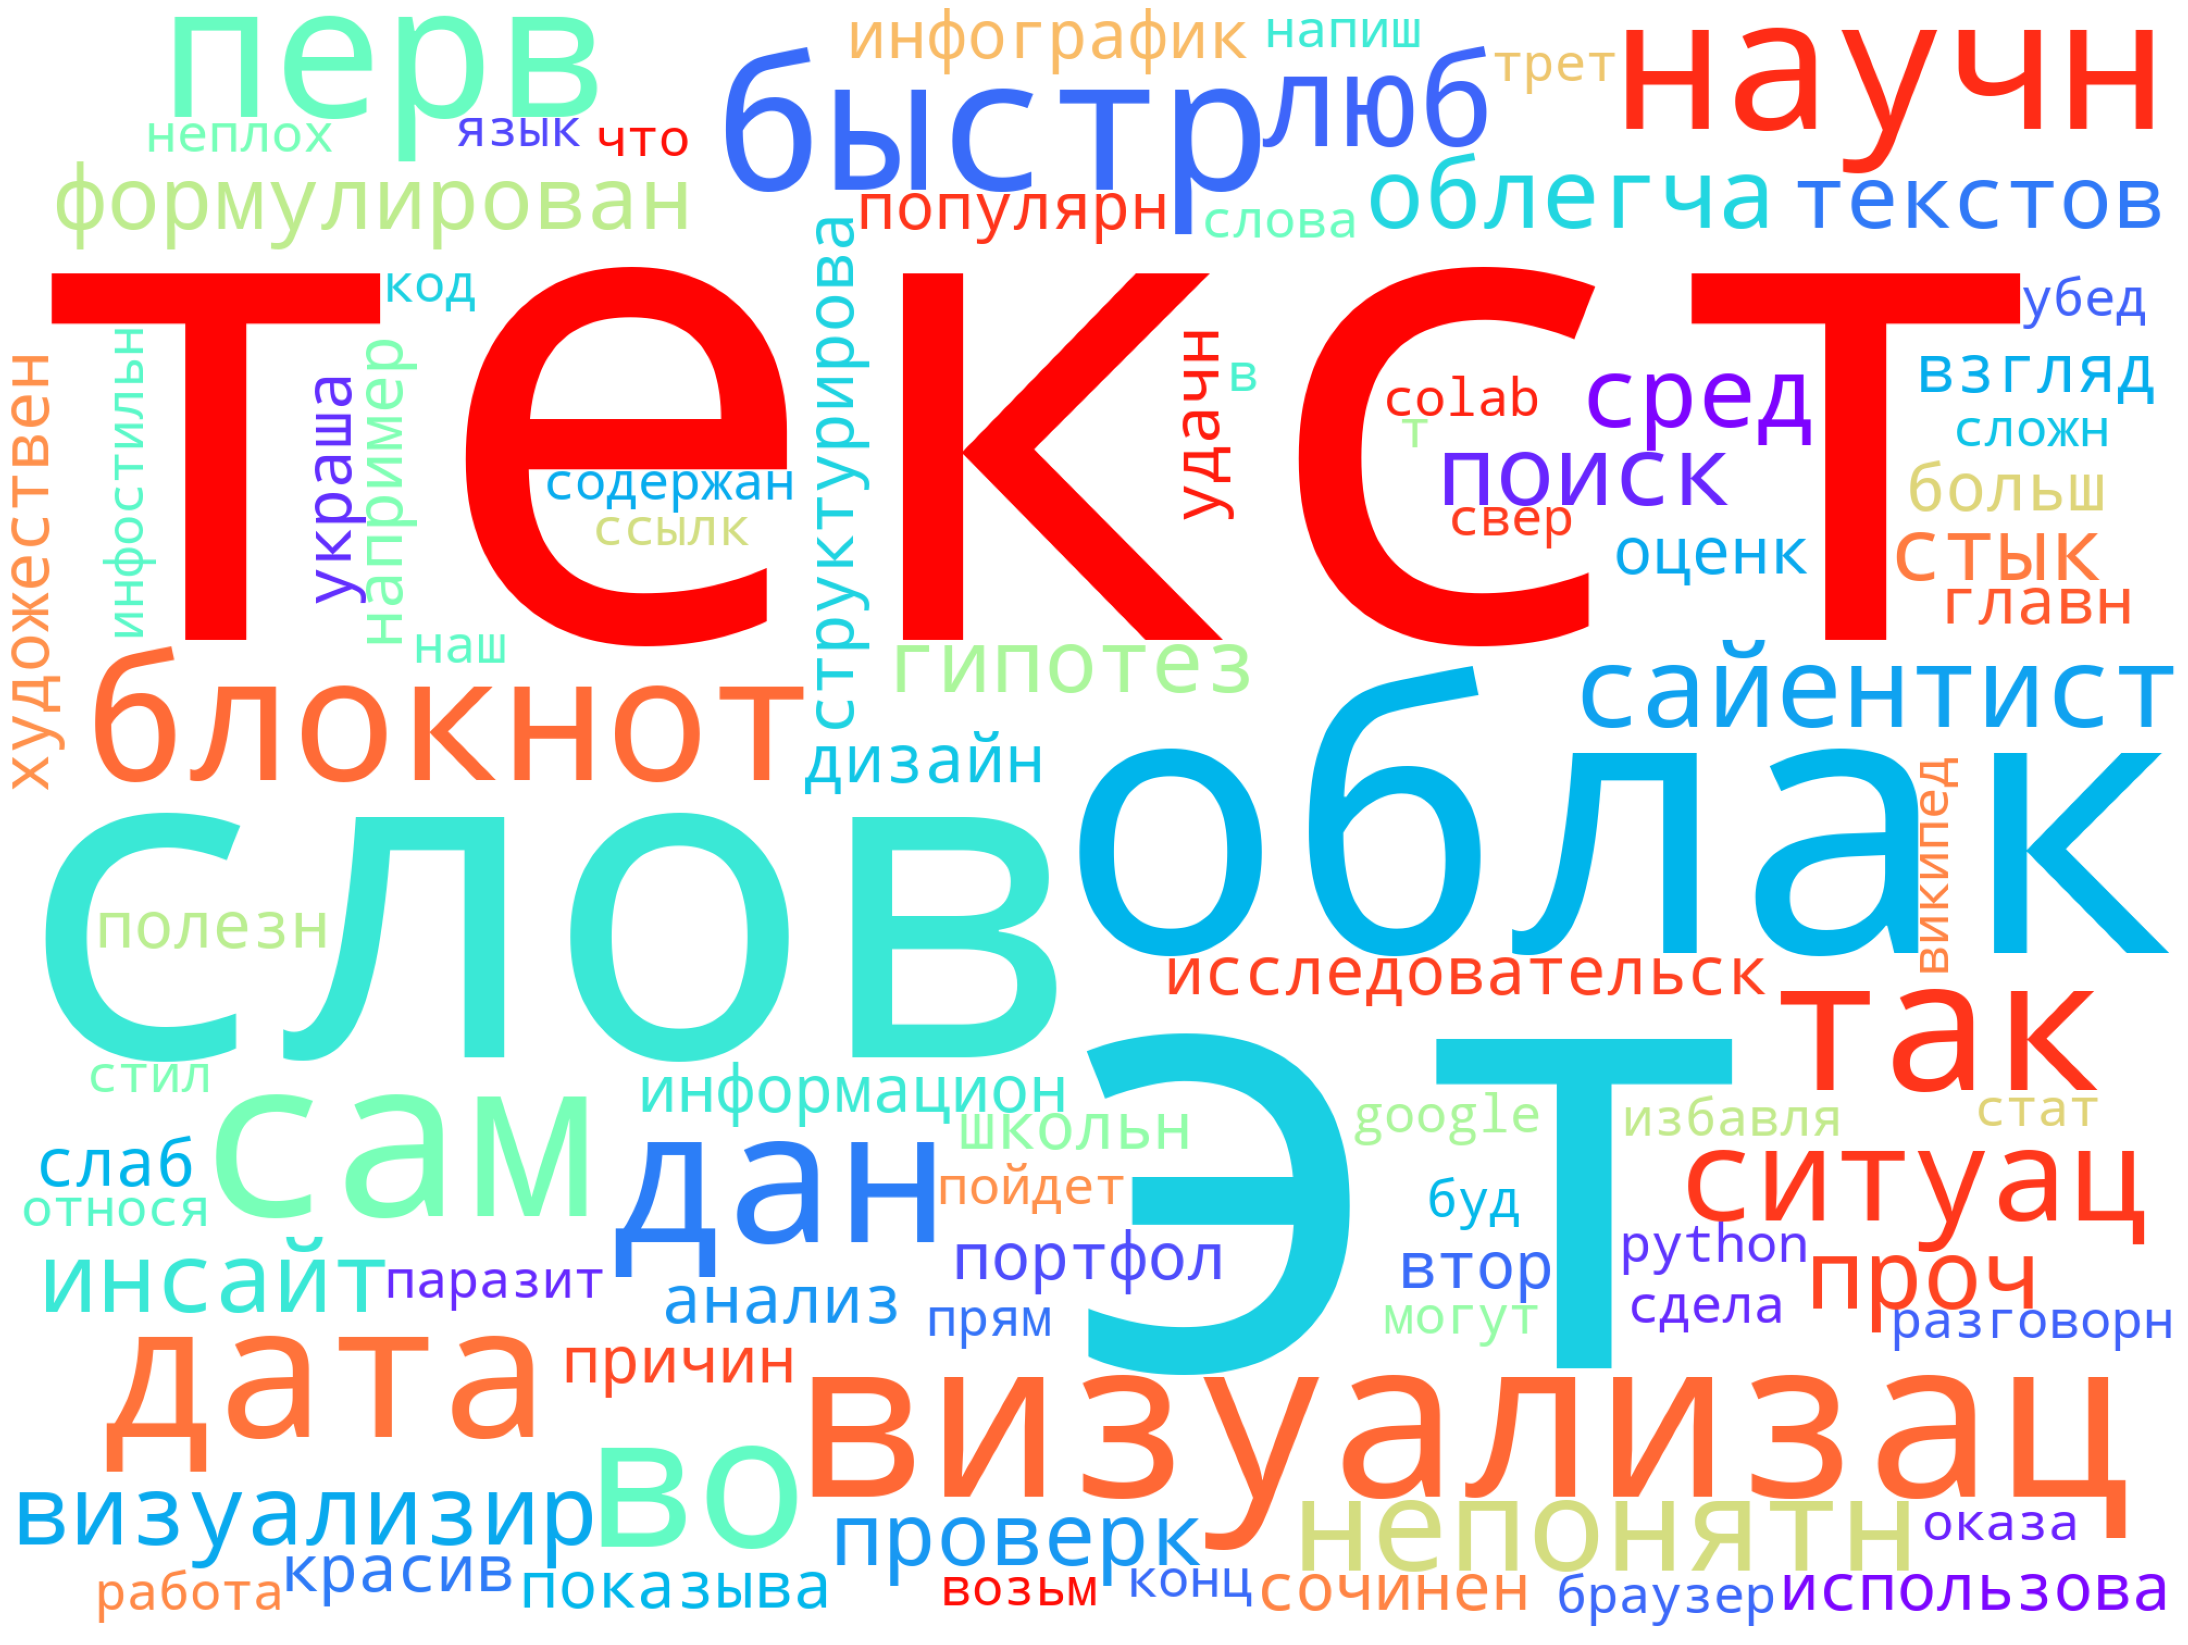

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#%matplotlib inline

# Генерируем облако слов
word_cloud = WordCloud(width = 2000, 
                      height = 1500, 
                      background_color='white', 
                      colormap='rainbow').generate(', '.join(cloud_clean))
plt.figure(figsize=(40, 30)) # Устанавливаем размер картинки
plt.imshow(word_cloud) # Что изображаем
plt.axis("off") # Без подписей на осях
plt.show() # показать изображение

###Частотный анализ

Многие компьтерные методы анализа текста основаны на статистике — в нашем случае это частотность символов / словоформ / лексем / биграмм / триграмм / частей речи и т.д., ее отношение к длине текста, средняя длина текстов и т.д.

Зачем нам знать частотность слов в тексте? Например, она говорит о том, какие слова наиболее характеры для того или иного текста. Сравнивая частотные слова в разных текстах можно определить степень их близости, классифицировать по жанру, теме и т.п., а также выявить явления, характерные для языка в целом.

Подход, когда текст представляется просто как куча слов, без информации об их порядке, называется bag of words.


### Закон Ципфа

**Закон Ципфа** («ранг—частота») — эмпирическая закономерность распределения частоты слов естественного языка: если все слова языка (или просто достаточно длинного текста) упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n (т.н. рангу этого слова). Например, второе по используемости слово встречается примерно в два раза реже, чем первое, третье — в три раза реже, чем первое, и т.д.

**Если закон Ципфа соблюдается — значит, перед нами нормальный текст на естественном языке. Если нет, то что-то с ним не так.**

### Закон Хипса

**Закон Хипса** — эмпирическая закономерность в лингвистике, описывающая распределение числа уникальных слов в документе (или наборе документов) как функцию от его длины. 

**Чем больше коллекция текстов, тем меньше новых токенов появляется с её пополнением**

##Способы считать частоту

### Абсолютная частота слова
Количество употреблений слова в тексте. Она не всегда уместна.


### Относительная частота слова
это отношение его абсолютной частоты к какой-нибудь другой величине, например, к длине текста или корпуса. Существуют разные способы подсчета относительной частоты. 

### IPM
Для сравнения частот в разных коллекциях текстов популярен $ipm$ *(items per million)* - отношение абсолютной частоты какого-либо элемента к объему корпуса, умноженное на миллион.

$$ ipm_{word} = \dfrac{f_{word}}V_{corpus} \        \times \  1,000,000 $$ 

Например, если текст состоит из 500 слов, и слово "котик" встречается там 50 раз, то 

$$ ipm_{котик} = \dfrac{50}{500} \       \times \  1,000,000 \     = 100,000 $$ 

Метрика IPM позволяет сравнивать тексты через их характеристики. Например, "Я" заметно чаще встречается в корпусе любительской литературы, чем в корпусе художественных произведений из НКРЯ.

Кстати, есть библиотеки с подсчетом ipm
* [разные языки](https://pypi.org/project/wordfreq/)
* отдельно [русский язык](https://pypi.org/project/ruword-frequency/)


In [ ]:
!pip install wordfreq

In [ ]:
# как часто слово "ring" встречается в корпусе английского языка?
from wordfreq import zipf_frequency
ipm = zipf_frequency('ring', 'en')
print(ipm)

In [ ]:
# а как часто - в нашем тексте?
print(full_text.count("ring") / len(full_text) * 1000000)

### TF-IDF

Tf-Idf - способ высоко оценить слова, которые одновременно
* показательны в документе
* не вездесущи в корпусе документов


Наивная идея такая: давайте оценка слова будет 
* увеличиваться, если оно частотно в документе
* уменьшаться, если оно встречается во многих документах

В таком противостоянии победят те слова, которые выделяют документы из многих им подобных.




###Пример с использованием sklearn

Сначала простой

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [42]:
corpus = ['Three Rings for the Elven-kings under the sky',
          'Seven for the Dwarf-lords in their halls of stone',
          'Nine for Mortal Men doomed to die',
          'One for the Dark Lord on his dark throne',
          'In the Land of Mordor where the Shadows lie',
          'One Ring to rule them all', 
          'One Ring to find them',
          'One Ring to bring them all and in the darkness bind them',
          'In the Land of Mordor where the Shadows lie']

In [ ]:
tfidf = tfidf_vectorizer.fit_transform(corpus)
print(tfidf)

In [48]:
tfidf.shape
# предположите, что означают эти числа?

(9, 42)

In [ ]:
tfidf.todense() # матрица
#print(tfidf.todense() # матрица)

In [ ]:
tfidf_vectorizer.vocabulary_ # словарь - не частотный!
#print(tfidf_vectorizer.vocabulary_)

In [ ]:
words = tfidf_vectorizer.get_feature_names_out()
words
#print(words)

In [ ]:
data = tfidf.todense().tolist() 
lotr = pd.DataFrame(data, columns = words)
lotr
#print(lotr)

### Сложный пример для нашего текста

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(text) # передаем текст как список строчек - матрица выстроится построчно
# посмотрим на размер матрицы
tfidf.shape

In [ ]:
tfidf.todense() # матрица

In [ ]:
tfidf_vectorizer.vocabulary_ # словарь

In [ ]:
words = tfidf_vectorizer.get_feature_names_out()
words

In [75]:
data = tfidf.todense().tolist() 
df = pd.DataFrame(data, columns = words)

In [ ]:
df
#print df

In [ ]:
max(df["frodo"])

In [ ]:
max(df["sam"])

Вернитесь на несколько шагов назад и постройте матрицу для первых 10 предложений

(измените значение для метода .fit_transform())

## Доп. задание по tf-idf

[Здесь](https://github.com/AnnSenina/Python_for_CL/tree/main/LotR) тексты отдельных книг из трилогии "Властелин Колец" 

Считайте их в три переменные и передайте в .fit_transform()) список из их названий

##N-gramms
Текст можно разделить на n-граммы – устойчивые сочетания по N слов:

    nltk.bigrams() – сочетания по два слова
    nltk.trigrams() – сочетания по три слова
    nltk.ngrams(list, n) – сочетания по N слов

In [ ]:
import nltk

freq_trigramms = Counter(nltk.trigrams(full_text))
freq_trigramms.most_common(10)

[(('mr.', 'frodo', 'said'), 43),
 (('let', 'us', 'go'), 36),
 (('sam', 'said', 'frodo'), 35),
 (('frodo', 'said', 'sam'), 21),
 (('aragorn', 'son', 'arathorn'), 20),
 (('gimli', 'glóin', 'son'), 13),
 (('yes', 'said', 'gandalf'), 12),
 (('could', 'see', 'nothing'), 12),
 (('yes', 'said', 'pippin'), 12),
 (('gimli', 'son', 'glóin'), 11)]